## **1. Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

## **2. Download Raw Dataset**

In [2]:
heart_disease = fetch_ucirepo(id=45) 

X = heart_disease.data.features 
y = heart_disease.data.targets 

print(heart_disease.metadata) 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

## **3. Save Raw Dataset**

UCI ML Link of dataset: [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)

Features Description:
- `age`: age of the patient in years
- `sex`: gender [1: male, 0: female]
- `cp`: type of chest pain [1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic]
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholesterol level in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl [1: true, 0: false]
- `restecg`: resting electrocardiographic results [0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy]
- `thalach`: maximum heart rate achieved during exercise
- `exang`: exercise-induced angina [1: yes, 0: no]
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: slope of the peak exercise ST segment [1: upsloping, 2: flat, 3: downsloping]
- `ca`: number of major vessels (0–3) colored by fluoroscopy
- `thal`: thalassemia condition [3: normal, 6: fixed defect, 7: reversible defect]
- `num`: diagnosis of heart disease [0: < 50% diameter narrowing, 1: > 50% diameter narrowing]

In [3]:
# combine features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
df.to_csv('../datasets/raw/ds2_uci_heart.csv', index=False)

   num  Sample  Percentage(%)
0    0     164          54.13
1    1     139          45.87


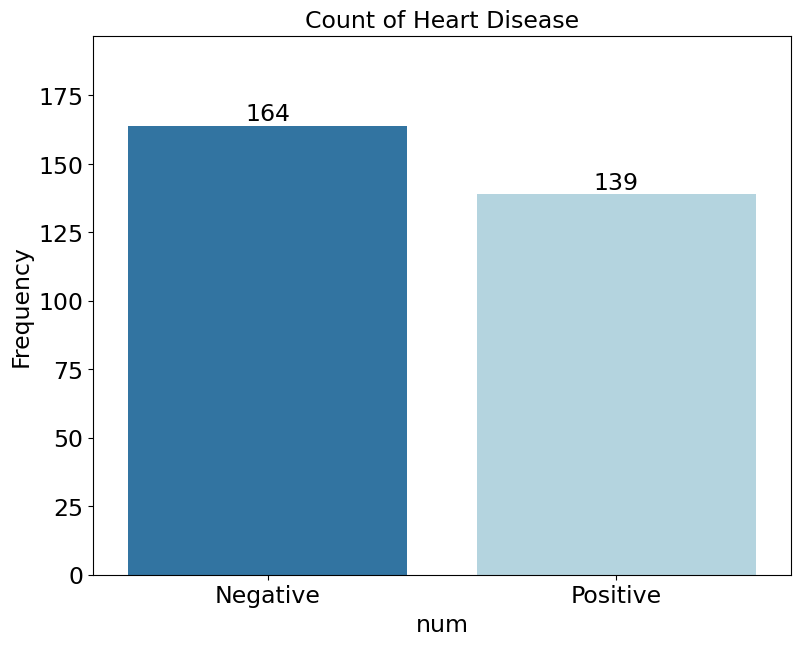

In [5]:
feature = 'num'
summary_df = df[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(2)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Heart Disease', fontsize=17)
ax = sns.countplot(data=df, x=feature, hue=feature, order=summary_df[feature], palette={True: 'lightblue', False: 'tab:blue'}, dodge=False, legend=False)
ax.set_xticks([False, True])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

## **4. Data Cleaning**

### **4.1 Delete Missing Values**

In [6]:
# check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [7]:
df = df.dropna()

### **4.2 Change Features Data Type**

In [8]:
# Change features "sex", "fbs", "exang", "num" to boolean data type
df = df.astype({
    "sex": "bool",
    "fbs": "bool",
    "exang": "bool",
    "num": "bool"
})

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,True,1,145,233,True,2,150,False,2.3,3,0.0,6.0,False
1,67,True,4,160,286,False,2,108,True,1.5,2,3.0,3.0,True
2,67,True,4,120,229,False,2,129,True,2.6,2,2.0,7.0,True
3,37,True,3,130,250,False,0,187,False,3.5,3,0.0,3.0,False
4,41,False,2,130,204,False,2,172,False,1.4,1,0.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,False,4,140,241,False,0,123,True,0.2,2,0.0,7.0,True
298,45,True,1,110,264,False,0,132,False,1.2,2,0.0,7.0,True
299,68,True,4,144,193,True,0,141,False,3.4,2,2.0,7.0,True
300,57,True,4,130,131,False,0,115,True,1.2,2,1.0,7.0,True


## **5. Feature Engineering**

### **5.1 One-Hot Encoding**

In [9]:
# print the number of unique values for each feature
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

age: 41 unique values
sex: 2 unique values
cp: 4 unique values
trestbps: 50 unique values
chol: 152 unique values
fbs: 2 unique values
restecg: 3 unique values
thalach: 91 unique values
exang: 2 unique values
oldpeak: 40 unique values
slope: 3 unique values
ca: 4 unique values
thal: 3 unique values
num: 2 unique values


In [10]:
# dummy encode categorical features "cp", "restecg", "slope", "ca", "thal"
df = pd.get_dummies(df, columns=["cp", "restecg", "slope", "ca", "thal"], drop_first=False)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63,True,145,233,True,150,False,2.3,False,True,...,False,False,True,True,False,False,False,False,True,False
1,67,True,160,286,False,108,True,1.5,True,False,...,False,True,False,False,False,False,True,True,False,False
2,67,True,120,229,False,129,True,2.6,True,False,...,False,True,False,False,False,True,False,False,False,True
3,37,True,130,250,False,187,False,3.5,False,False,...,False,False,True,True,False,False,False,True,False,False
4,41,False,130,204,False,172,False,1.4,False,False,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,False,140,241,False,123,True,0.2,True,False,...,False,True,False,True,False,False,False,False,False,True
298,45,True,110,264,False,132,False,1.2,True,True,...,False,True,False,True,False,False,False,False,False,True
299,68,True,144,193,True,141,False,3.4,True,False,...,False,True,False,False,False,True,False,False,False,True
300,57,True,130,131,False,115,True,1.2,True,False,...,False,True,False,False,True,False,False,False,False,True


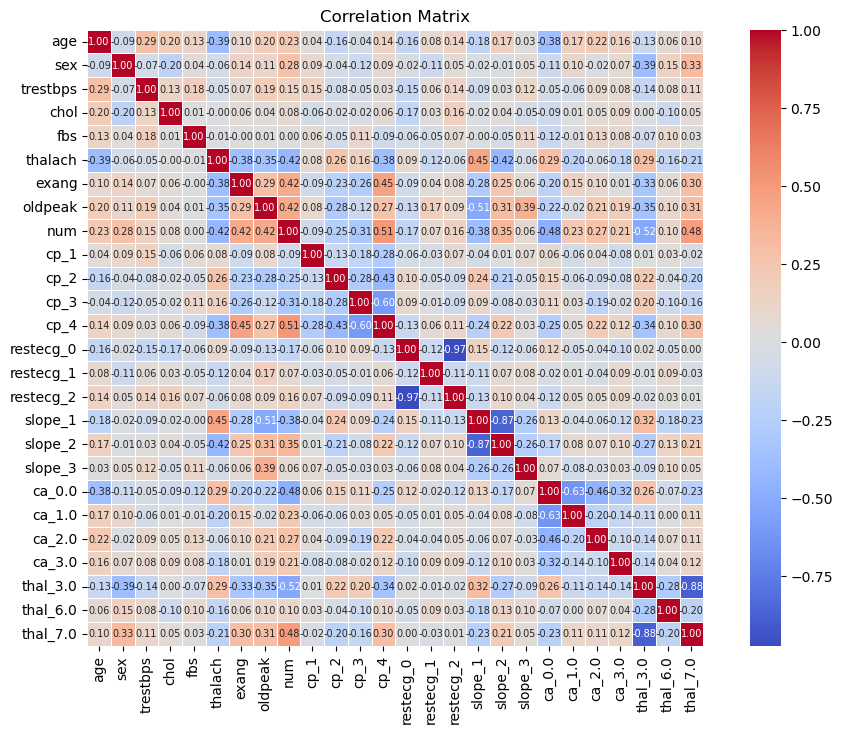

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5, annot_kws={"size": 7})
plt.title('Correlation Matrix')
plt.show()

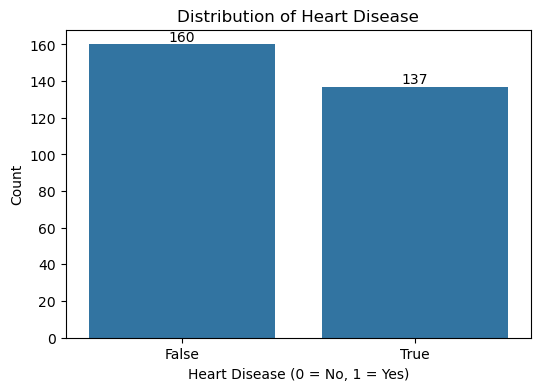

In [12]:
# Label distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='num', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## **6. Export Cleaned Dataset**

In [ ]:
df.to_csv('../datasets/processed/ds2_uci_heart_clean.csv', index=False)